# Drop Chance Calculator

## Setup

In [7]:
# Import statements
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns

from random import randint

from IPython.display import display
from IPython.display import clear_output

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Calculator

In [8]:
# Inputs
n_trials = 35000
odds_event = 1
odds_non_event = 3000

# Calculating the probability curve of drop chance given the inputs
trials = []
probs = []

for i in range(1, n_trials + 1):
    probability_of_drop = 1 - ((1 - odds_event/odds_non_event) ** i)

    trials.append(i)
    probs.append(probability_of_drop)

probs_df = pd.DataFrame({
    "trials": trials,
    "probs": probs
})

# Creating visual
fig = px.line(
    probs_df,
    x="trials",
    y="probs",
)
fig.update_layout(
    title="Probability of {}/{} Event Occuring Over {} Trials".format(odds_event, odds_non_event, n_trials),
    xaxis_title="Trials",
    yaxis_title="P(Event)",
    template="plotly_dark",
    width=1280,
    height=720,
)
fig.show()

## Simulation

,Trial,Rolls
0,1,68
1,2,12
2,3,13
3,4,452
4,5,58


Average Number of Attempts for Event to Occur: 109.88135593220339


count    118.000000
mean     109.881356
std      103.224274
min        3.000000
25%       36.000000
50%       76.500000
75%      156.500000
max      497.000000
Name: Rolls, dtype: float64

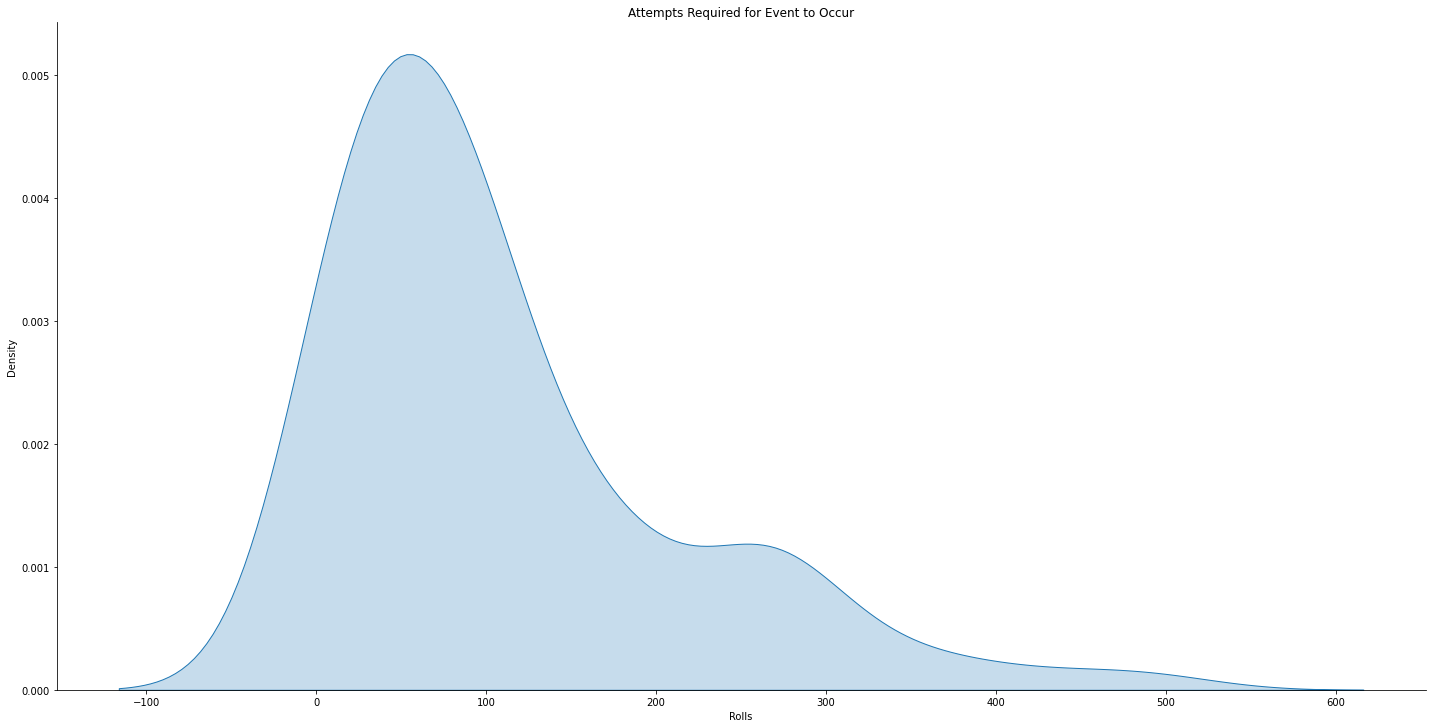

In [9]:
# Inputs

ratio_event = 1
ratio_non_event = 118
n_trials = ratio_non_event

# Empty list to store roll count for each trial
trials = []
trial_outcomes = []

for i in range(1, n_trials + 1):
    # Counter for number of rolls
    roll_count = 0

    # Loop until "magic number" is rolled
    while True:
        roll = randint(1, ratio_non_event)
        roll_count += 1

        # If "magic number" is rolled, break the loop
        if int(roll) == int(n_trials / 2):
            trials.append(i)
            trial_outcomes.append(roll_count)
            #print("Trial {} took {} rolls to get a 1".format(i, roll_count))
            break

# Creating dataframe to store trial results
simulation_results = pd.DataFrame({
    "Trial": pd.Series(trials),
    "Rolls": pd.Series(trial_outcomes)
})

# Displaying results
display(simulation_results.head())
print("Average Number of Attempts for Event to Occur: {}".format(simulation_results["Rolls"].mean()))
display(simulation_results["Rolls"].describe())
sns.displot(data=simulation_results, x="Rolls", kind="kde", fill=True, height=10, aspect=2).set(title="Attempts Required for Event to Occur")